Trying the Prana Exercise with our Dataset

In [1]:
%config IPCompleter.greedy=True
from sklearn import datasets
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import process_csv_data
import betting
import numpy as np
import csv

In [2]:
mySet = process_csv_data.Dataset('../data/matches_all.csv')

In [3]:
df = pd.DataFrame(mySet.processed_results)

In [4]:
df.head(10)

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,away-wins,away-draws,away-losses,away-goals,away-opposition-goals
0,A,1.36,4.75,8.50,7,1,2,26,12,3,6,1,11,6
1,D,2.40,3.30,2.90,2,3,5,9,14,5,2,3,17,12
2,D,3.20,3.30,2.25,4,2,4,11,13,7,2,1,19,8
3,H,1.75,3.75,4.33,4,1,5,14,16,4,1,5,13,12
4,D,1.40,4.33,8.00,5,3,2,21,11,2,3,5,14,20
5,A,1.83,3.50,4.20,1,2,7,5,17,1,1,8,7,21
6,D,2.00,3.50,3.60,3,3,4,10,18,2,2,6,12,22
7,H,2.70,3.25,2.60,5,3,2,15,12,6,2,2,17,11
8,A,3.60,3.30,2.05,1,5,4,9,11,6,2,2,16,10
9,D,2.30,3.25,2.90,7,2,1,20,9,6,1,3,25,15


In [5]:
le = preprocessing.LabelEncoder()
le.fit([ "A", "D", "H"])
df.loc[:,['result']]=le.transform(df['result'])

df.head()

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,away-wins,away-draws,away-losses,away-goals,away-opposition-goals
0,0,1.36,4.75,8.50,7,1,2,26,12,3,6,1,11,6
1,1,2.40,3.30,2.90,2,3,5,9,14,5,2,3,17,12
2,1,3.20,3.30,2.25,4,2,4,11,13,7,2,1,19,8
3,2,1.75,3.75,4.33,4,1,5,14,16,4,1,5,13,12
4,1,1.40,4.33,8.00,5,3,2,21,11,2,3,5,14,20


In [6]:
y = df['result']
X = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=5, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5213580075135662


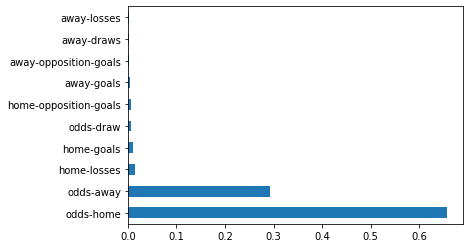

In [36]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [37]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

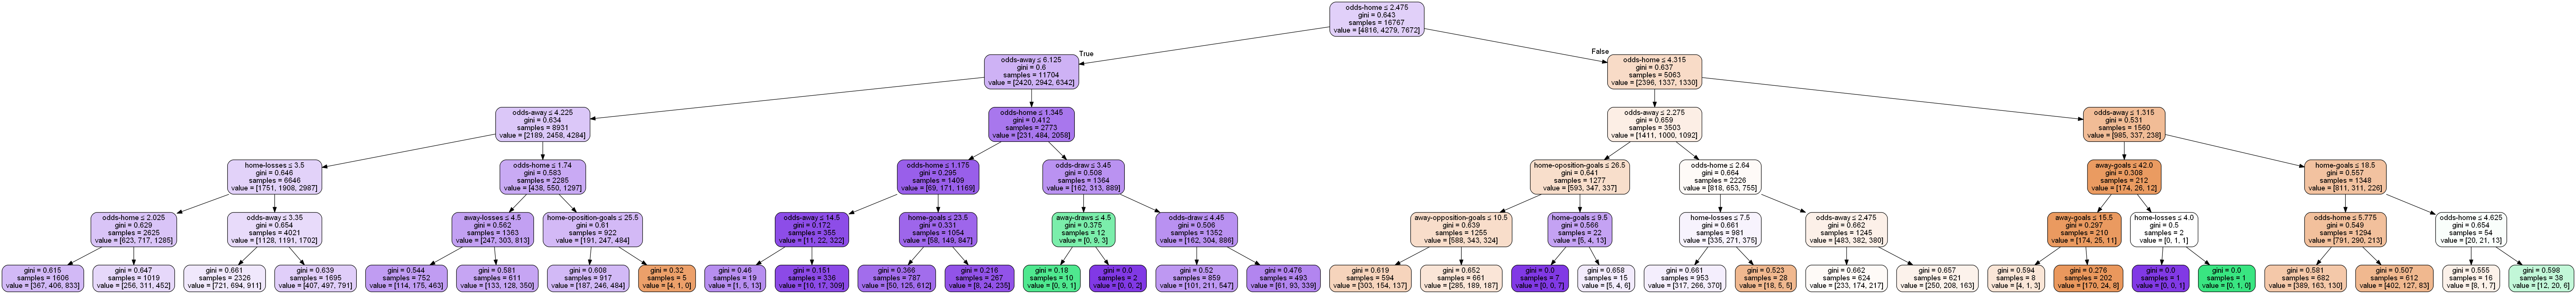

In [38]:
feature_cols=['odds-home','odds-draw','odds-away','home-wins','home-draws','home-losses','home-goals','home-oposition-goals','away-wins','away-draws','away-losses','away-goals','away-opposition-goals']
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data, 
                feature_names=feature_cols,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

For Sergej without the Important Columns :D

In [39]:
y = df['result']
X = df.iloc[:, [4,5,6,7,8,9,10,11,12,13]]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=5, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.49784332823152916


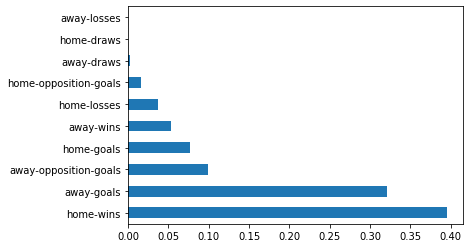

In [41]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

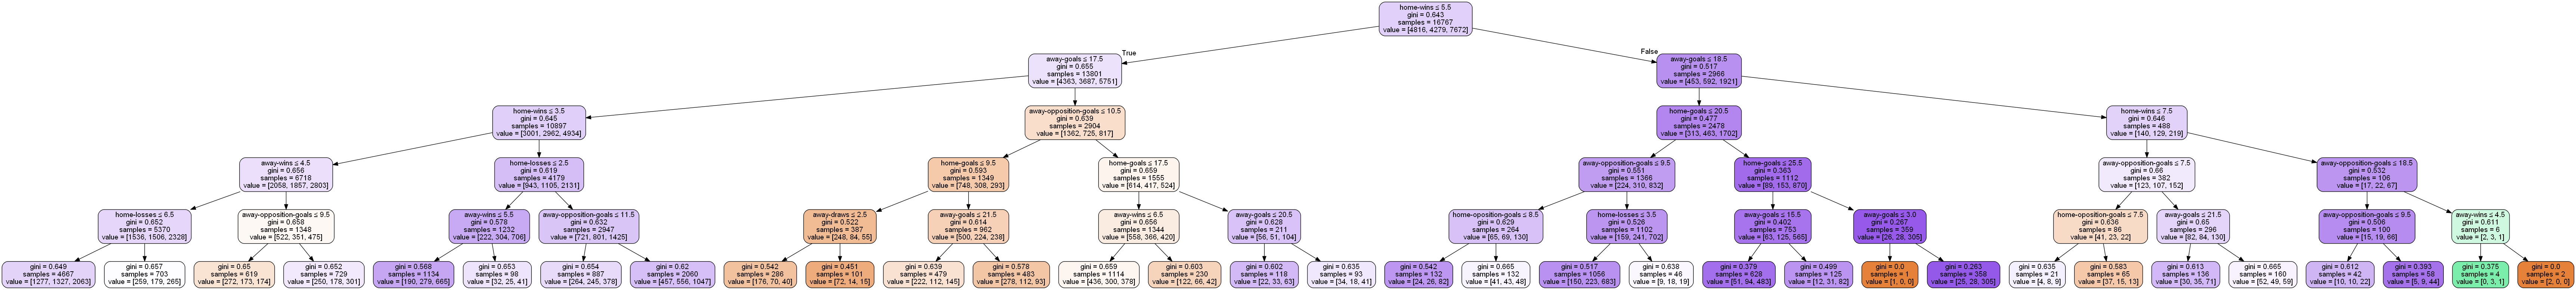

In [42]:
feature_cols=['home-wins','home-draws','home-losses','home-goals','home-oposition-goals','away-wins','away-draws','away-losses','away-goals','away-opposition-goals']
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data, 
                feature_names=feature_cols,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())